In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Phavour\Downloads\Personal Python-ML project\Simplilearn\Unsupervised workshop\visualising outputs\Pokemon.csv", 
                   encoding='unicode_escape',index_col=None)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# types = data['Type 1'].isin(['Grass','Fire','Water'])
cols_drop = ['#','Type 1','Type 2','Generation','Legendary']
data = data.drop(columns=cols_drop)
data.head()


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [4]:
from sklearn.cluster import KMeans

In [5]:
k_means = KMeans(n_clusters=3, random_state=3)

data['cluster'] = k_means.fit_predict(data[['Attack','Defense']])

centroid = k_means.cluster_centers_
cen_x = [i[0] for i in centroid]
cen_y = [i[1] for i in centroid]

data['cen_x'] = data.cluster.map({0: cen_x[0],1: cen_x[1],2: cen_x[2]})
data['cen_y'] = data.cluster.map({0: cen_y[0],1: cen_y[1],2: cen_y[2]})

colors =['#DF2020','#81DF20','#2095DF']

data['c'] = data.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

C:\Users\Phavour\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
k_means.cluster_centers_

array([[ 58.5816092 ,  54.7954023 ],
       [ 82.76829268, 114.83536585],
       [120.11940299,  81.61691542]])

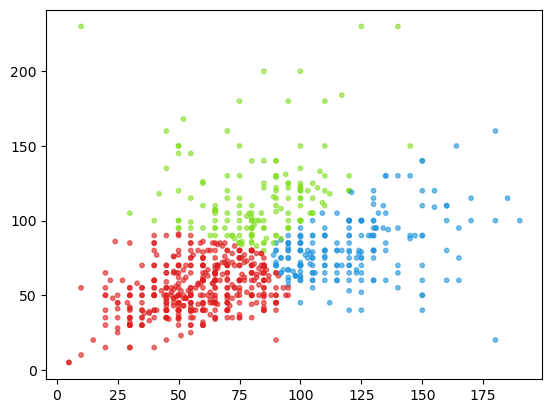

In [6]:
%matplotlib inline
plt.scatter(data.Attack, data.Defense,alpha=0.6, c=data.c, s=10)

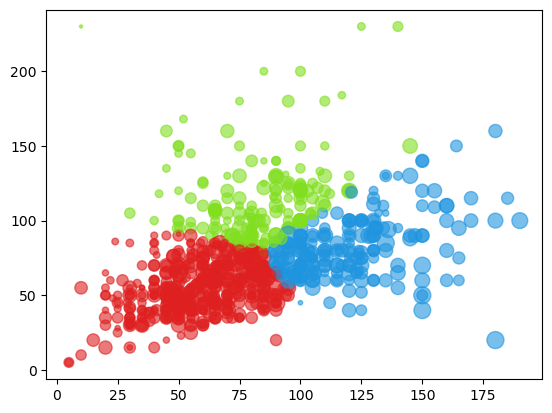

In [7]:
plt.scatter(data.Attack, data.Defense,alpha=0.6, c=data.c, s=data.Speed)

Text(0, 0.5, 'Defense')

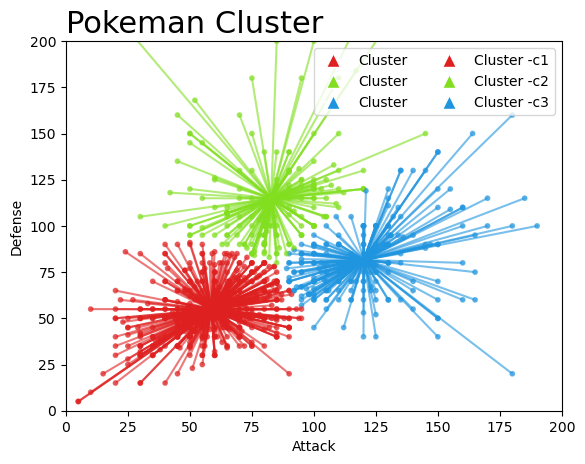

In [8]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1,figure=(12,12))

plt.scatter(data.Attack, data.Defense,alpha=0.6, c=data.c, s=10)

plt.scatter(cen_x, cen_y,marker='^',alpha=0.6, c=colors, s=70)

for idx, val in data.iterrows():
    x = [val.Attack, val.cen_x]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.6)
    
##centroids
cent_leg = [Line2D([0],[0],marker='^',color='w', label='Centroid -c{}'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
##legend
legend_elements = [Line2D([0],[0],marker='^', color='w',label= 'Cluster'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

legend_elements.extend([Line2D([0],[0],marker='^', color='w',label= 'Cluster -c{}'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])

plt.legend(handles = legend_elements, loc ='upper right' ,ncol=2)
plt.xlim(0, 200),
plt.ylim(0, 200),
plt.title('Pokeman Cluster' ,loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel ('Defense')